# SMOTE

In [1]:
import pandas as pd

df_train = pd.read_csv('data/dataframe_train.csv')
df_test = pd.read_csv('data/dataframe_test.csv')

In [2]:
df_train.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,...,CA3TR,Heure,Jour,Mois,Année,Heure2,Minute,Seconde,Date,Heures
0,A013010004908126703060931,78643044,0,20.00,1,0.0,0.0,0.0,551.0,0.0,...,0.0,27134,1,2,2017,7,32,14,2017-02-01,07:32:14
1,A013010002908283134592527,78643046,0,57.64,1,0.0,0.0,0.0,549.0,0.0,...,0.0,28058,1,2,2017,7,47,38,2017-02-01,07:47:38
2,A011010002908105209831316,78643047,0,54.29,0,1.0,1.0,1.0,267.0,0.0,...,0.0,28128,1,2,2017,7,48,48,2017-02-01,07:48:48
3,A044014706908021215591000,78643049,0,42.51,1,0.0,0.0,0.0,523.0,0.0,...,0.0,29633,1,2,2017,8,13,53,2017-02-01,08:13:53
4,A059010041908012913210426,78643050,0,50.84,1,0.0,0.0,0.0,551.0,0.0,...,0.0,29904,1,2,2017,8,18,24,2017-02-01,08:18:24


In [3]:
from imblearn.over_sampling import SMOTE

# Diviser le DataFrame en X (caractéristiques) et y (étiquettes)
X = df_train.drop(['ZIBZIN','IDAvisAutorisationCheque','FlagImpaye','Date','Heures'], axis=1)
y = df_train['FlagImpaye']

df_test= df_test.drop(['ZIBZIN','IDAvisAutorisationCheque','Date','Heures'], axis=1)

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Afficher les informations après le SMOTE
print("Nombre d'échantillons avant SMOTE:", len(X))
print("Nombre d'échantillons après SMOTE:", len(X_train_resampled))

Nombre d'échantillons avant SMOTE: 3404535
Nombre d'échantillons après SMOTE: 6772258


In [4]:
# Concatenate X_train_resampled and y_train_resampled
df_train = pd.concat([X_train_resampled, y_train_resampled], axis=1)

df_train.head()

,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,TauxImpNb_RB,EcartNumCheq,NbrMagasin3J,...,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Année,Heure2,Minute,Seconde,FlagImpaye
0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,...,20.0,0.0,27134,1,2,2017,7,32,14,0
1,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,1.0,...,40.0,0.0,28058,1,2,2017,7,47,38,0
2,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,1.0,...,40.0,0.0,28128,1,2,2017,7,48,48,0
3,42.51,1,0.0,0.0,0.0,523.0,0.0,0.0,0.0,1.0,...,40.0,0.0,29633,1,2,2017,8,13,53,0
4,50.84,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,...,40.0,0.0,29904,1,2,2017,8,18,24,0


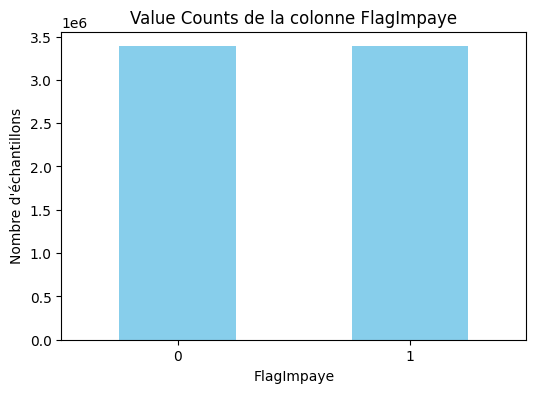

FlagImpaye
0    3386129
1    3386129
Name: count, dtype: int64


In [5]:
from matplotlib import pyplot as plt

# Value count de la colonne 'FlagImpaye' après SMOTE
value_counts = df_train["FlagImpaye"].value_counts()

# Créer un diagramme à barres
plt.figure(figsize=(6, 4))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts de la colonne FlagImpaye')
plt.xlabel('FlagImpaye')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=0)
plt.show()
print(value_counts)

In [6]:
df_train.to_csv('data/smote/dataframe_train.csv',index=False)
df_test.to_csv('data/smote/dataframe_test.csv',index=False)